In [13]:
import Preprocessing
import os
import numpy as np
import re
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

def getNonEmptyLines(filePath):
    textLines = []
    with open(filePath) as dataFile:
        for dataLine in dataFile:
            if not re.match(r"^\s*$", dataLine):
                textLines.append(dataLine)

    return textLines

def getLineWordLengths(filePath):
    lineTokenCounts = []

    dataLines = getNonEmptyLines(filePath)
    for dataLine in dataLines:
        numTokens = len(dataLine.split())
        lineTokenCounts.append(numTokens)

    return lineTokenCounts

def analyzeWordLengths(wordLengths):
    avgWordLen = np.mean(wordLengths)
    topHalfDeciles = np.quantile(wordLengths, [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.98, 1])
    print("average word length= ", avgWordLen)
    print("50th, 60th, 70th, 80th, 90th, 95th, 98th, and 100th percentile word lengths:\n", topHalfDeciles)



In [10]:
titlesSummaryFilePath = os.path.join(Preprocessing.datasetDirPath, Preprocessing.TITLES_SUMMARY_FILENAME)
locationsSummaryFilePath = os.path.join(Preprocessing.datasetDirPath, Preprocessing.LOCATIONS_SUMMARY_FILENAME)
departmentsSummaryFilePath = os.path.join(Preprocessing.datasetDirPath, Preprocessing.DEPARTMENTS_SUMMARY_FILENAME)
companyProfilesSummaryFilePath = os.path.join(Preprocessing.datasetDirPath, Preprocessing.COMPANY_PROFILES_SUMMARY_FILENAME)
descriptionsSummaryFilePath = os.path.join(Preprocessing.datasetDirPath, Preprocessing.DESCRIPTIONS_SUMMARY_FILENAME)
requirementsSummaryFilePath = os.path.join(Preprocessing.datasetDirPath, Preprocessing.REQUIREMENTS_SUMMARY_FILENAME)
benefitsSummaryFilePath = os.path.join(Preprocessing.datasetDirPath, Preprocessing.BENEFITS_SUMMARY_FILENAME)

titleWordLengths = getLineWordLengths(titlesSummaryFilePath)
locationWordLengths = getLineWordLengths(locationsSummaryFilePath)
departmentWordLengths = getLineWordLengths(departmentsSummaryFilePath)
companyProfileWordLengths = getLineWordLengths(companyProfilesSummaryFilePath)
descriptionWordLengths = getLineWordLengths(descriptionsSummaryFilePath)
requirementsWordLengths = getLineWordLengths(requirementsSummaryFilePath)
benefitWordLengths = getLineWordLengths(benefitsSummaryFilePath)

print("title word lengths:")
analyzeWordLengths(titleWordLengths)
print("location word lengths:")
analyzeWordLengths(locationWordLengths)
print("department word lengths:")
analyzeWordLengths(departmentWordLengths)
print("company profile word lengths:")
analyzeWordLengths(companyProfileWordLengths)
print("description word lengths:")
analyzeWordLengths(descriptionWordLengths)
print("requirements word lengths:")
analyzeWordLengths(requirementsWordLengths)
print("benefits word lengths:")
analyzeWordLengths(benefitWordLengths)


title word lengths:
average word length=  3.727908277404922
50th, 60th, 70th, 80th, 90th, 95th, 98th, and 100th percentile word lengths:
 [ 3.  4.  4.  5.  6.  8. 10. 18.]
location word lengths:
average word length=  3.062792289266568
50th, 60th, 70th, 80th, 90th, 95th, 98th, and 100th percentile word lengths:
 [ 3.  3.  3.  4.  4.  4.  5. 22.]
department word lengths:
average word length=  1.3977865612648221
50th, 60th, 70th, 80th, 90th, 95th, 98th, and 100th percentile word lengths:
 [ 1.  1.  2.  2.  2.  3.  3. 39.]
company profile word lengths:
average word length=  70.7895964864123
50th, 60th, 70th, 80th, 90th, 95th, 98th, and 100th percentile word lengths:
 [ 64.  69.  81. 106. 133. 167. 223. 556.]
description word lengths:
average word length=  111.51378712455954
50th, 60th, 70th, 80th, 90th, 95th, 98th, and 100th percentile word lengths:
 [  93.   111.   132.6  164.   213.   263.   329.  1461. ]
requirements word lengths:
average word length=  65.23353096179183
50th, 60th, 70th

In [44]:
def countTermsUnderXFreq(termFreqs, cutoff):
    numTermsUnderX = len([freqVal for freqVal  in termFreqs if freqVal < cutoff ])
    print("%d distinct terms under %d" % (numTermsUnderX, cutoff))
    return numTermsUnderX

def analyzeTermFrequencies(docsFilePath):
    docs = getNonEmptyLines(docsFilePath)
    docsTokenizer = keras.preprocessing.text.Tokenizer()
    docsTokenizer.fit_on_texts(docs)
    docsTermFrequencies = docsTokenizer.word_counts
    numTerms = len(docsTermFrequencies)
    print("%d distinct terms" % numTerms)
    docsFrequencyNums = docsTermFrequencies.values()

    plt.hist(docsFrequencyNums, bins=30)
    termsUnder100 = countTermsUnderXFreq(docsFrequencyNums, 100)
    termsUnder50 = countTermsUnderXFreq(docsFrequencyNums, 50)
    termsUnder25 = countTermsUnderXFreq(docsFrequencyNums, 25)
    termsUnder10 = countTermsUnderXFreq(docsFrequencyNums, 10)
    termsUnder5 = countTermsUnderXFreq(docsFrequencyNums, 5)
    termsUnder3 = countTermsUnderXFreq(docsFrequencyNums, 3)
    termsUnder2 = countTermsUnderXFreq(docsFrequencyNums, 2)

    print("vocab size for everything used 50 or more times: ", numTerms - termsUnder50)
    print("vocab size for everything used 25 or more times: ", numTerms - termsUnder25)
    print("vocab size for everything used 10 or more times: ", numTerms - termsUnder10)
    print("vocab size for everything used 5 or more times: ", numTerms - termsUnder5)
    print("vocab size for everything used 3 or more times: ", numTerms - termsUnder3)
    print("vocab size for everything used 2 or more times: ", numTerms - termsUnder2)

for title term frequencies:
4708 distinct terms
4585 distinct terms under 100
4486 distinct terms under 50
4316 distinct terms under 25
3933 distinct terms under 10
3434 distinct terms under 5
2797 distinct terms under 3
2128 distinct terms under 2
vocab size for everything used 50 or more times:  222
vocab size for everything used 25 or more times:  392
vocab size for everything used 10 or more times:  775
vocab size for everything used 5 or more times:  1274
vocab size for everything used 3 or more times:  1911
vocab size for everything used 2 or more times:  2580


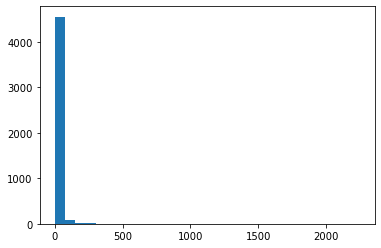

In [45]:
print("for title term frequencies:")
analyzeTermFrequencies(titlesSummaryFilePath)

for location term frequencies:
2335 distinct terms
2265 distinct terms under 100
2207 distinct terms under 50
2088 distinct terms under 25
1862 distinct terms under 10
1536 distinct terms under 5
1216 distinct terms under 3
802 distinct terms under 2
vocab size for everything used 50 or more times:  128
vocab size for everything used 25 or more times:  247
vocab size for everything used 10 or more times:  473
vocab size for everything used 5 or more times:  799
vocab size for everything used 3 or more times:  1119
vocab size for everything used 2 or more times:  1533


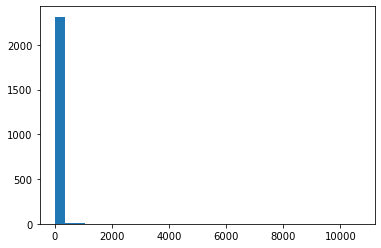

In [46]:
print("for location term frequencies:")
analyzeTermFrequencies(locationsSummaryFilePath)

for department term frequencies:
1060 distinct terms
1042 distinct terms under 100
1032 distinct terms under 50
1002 distinct terms under 25
938 distinct terms under 10
833 distinct terms under 5
695 distinct terms under 3
528 distinct terms under 2
vocab size for everything used 50 or more times:  28
vocab size for everything used 25 or more times:  58
vocab size for everything used 10 or more times:  122
vocab size for everything used 5 or more times:  227
vocab size for everything used 3 or more times:  365
vocab size for everything used 2 or more times:  532


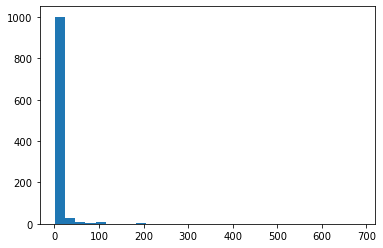

In [47]:
print("for department term frequencies:")
analyzeTermFrequencies(departmentsSummaryFilePath)

for company profile term frequencies:
14341 distinct terms
12531 distinct terms under 100
11375 distinct terms under 50
9808 distinct terms under 25
7110 distinct terms under 10
4984 distinct terms under 5
3362 distinct terms under 3
2065 distinct terms under 2
vocab size for everything used 50 or more times:  2966
vocab size for everything used 25 or more times:  4533
vocab size for everything used 10 or more times:  7231
vocab size for everything used 5 or more times:  9357
vocab size for everything used 3 or more times:  10979
vocab size for everything used 2 or more times:  12276


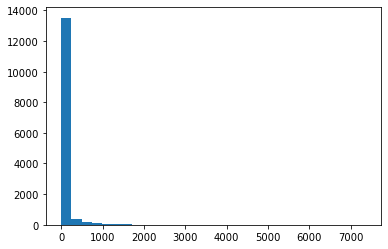

In [48]:
print("for company profile term frequencies:")
analyzeTermFrequencies(companyProfilesSummaryFilePath)

for description term frequencies:
58877 distinct terms
56118 distinct terms under 100
54648 distinct terms under 50
52672 distinct terms under 25
48542 distinct terms under 10
44103 distinct terms under 5
38523 distinct terms under 3
30368 distinct terms under 2
vocab size for everything used 50 or more times:  4229
vocab size for everything used 25 or more times:  6205
vocab size for everything used 10 or more times:  10335
vocab size for everything used 5 or more times:  14774
vocab size for everything used 3 or more times:  20354
vocab size for everything used 2 or more times:  28509


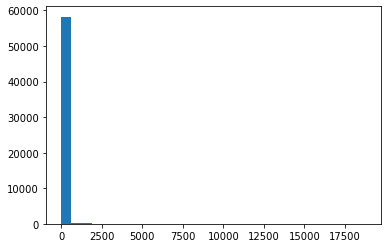

In [49]:
print("for description term frequencies:")
analyzeTermFrequencies(descriptionsSummaryFilePath)

for requirements term frequencies:
48003 distinct terms
46493 distinct terms under 100
45596 distinct terms under 50
44312 distinct terms under 25
41567 distinct terms under 10
37861 distinct terms under 5
33189 distinct terms under 3
26273 distinct terms under 2
vocab size for everything used 50 or more times:  2407
vocab size for everything used 25 or more times:  3691
vocab size for everything used 10 or more times:  6436
vocab size for everything used 5 or more times:  10142
vocab size for everything used 3 or more times:  14814
vocab size for everything used 2 or more times:  21730


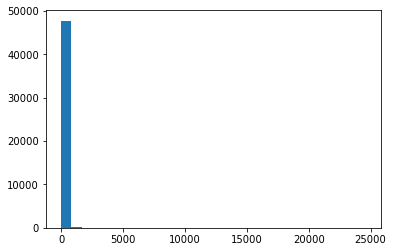

In [50]:
print("for requirements term frequencies:")
analyzeTermFrequencies(requirementsSummaryFilePath)

for benefits term frequencies:
15998 distinct terms
15307 distinct terms under 100
14787 distinct terms under 50
13975 distinct terms under 25
12226 distinct terms under 10
10292 distinct terms under 5
8404 distinct terms under 3
6164 distinct terms under 2
vocab size for everything used 50 or more times:  1211
vocab size for everything used 25 or more times:  2023
vocab size for everything used 10 or more times:  3772
vocab size for everything used 5 or more times:  5706
vocab size for everything used 3 or more times:  7594
vocab size for everything used 2 or more times:  9834


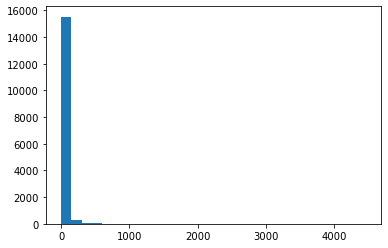

In [51]:
print("for benefits term frequencies:")
analyzeTermFrequencies(benefitsSummaryFilePath)